In [1]:
!pip install haversine
!pip install Jinja2==3.0.0
!pip install eli5==0.12.0

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
# from google.colab import files
from scipy.stats.mstats import winsorize
from statsmodels.graphics.gofplots import qqplot
from sklearn.preprocessing import normalize, RobustScaler
import io
from sklearn.model_selection import train_test_split

from sklearn.feature_selection import f_regression
import pandas as pd
import statsmodels.api as sm
from pandas.testing import assert_frame_equal

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error 
from sklearn import datasets, linear_model

from sklearn import metrics
import eli5
from eli5.sklearn import PermutationImportance

from sklearn.impute import SimpleImputer
import statistics 

from jinja2.filters import do_default
import warnings
warnings.filterwarnings('ignore')

In [3]:
!pip install waterfallcharts

In [4]:
import waterfall_chart
%matplotlib inline

In [5]:
df = pd.read_csv(r"Downloads/Flights_2022.csv")

In [6]:
df.head()

,FlightDate,Airline,Origin,Dest,Cancelled,Diverted,CRSDepTime,DepTime,DepDelayMinutes,DepDelay,...,WheelsOff,WheelsOn,TaxiIn,CRSArrTime,ArrDelay,ArrDel15,ArrivalDelayGroups,ArrTimeBlk,DistanceGroup,DivAirportLandings
0,4/4/2022,"Commutair Aka Champlain Enterprises, Inc.",GJT,DEN,False,False,1133,1123.0,0.0,-10.0,...,1140.0,1220.0,8.0,1245,-17.0,0.0,-2.0,1200-1259,1,0
1,4/4/2022,"Commutair Aka Champlain Enterprises, Inc.",HRL,IAH,False,False,732,728.0,0.0,-4.0,...,744.0,839.0,9.0,849,-1.0,0.0,-1.0,0800-0859,2,0
2,4/4/2022,"Commutair Aka Champlain Enterprises, Inc.",DRO,DEN,False,False,1529,1514.0,0.0,-15.0,...,1535.0,1622.0,14.0,1639,-3.0,0.0,-1.0,1600-1659,2,0
3,4/4/2022,"Commutair Aka Champlain Enterprises, Inc.",IAH,GPT,False,False,1435,1430.0,0.0,-5.0,...,1446.0,1543.0,4.0,1605,-18.0,0.0,-2.0,1600-1659,2,0
4,4/4/2022,"Commutair Aka Champlain Enterprises, Inc.",DRO,DEN,False,False,1135,1135.0,0.0,0.0,...,1154.0,1243.0,8.0,1245,6.0,0.0,0.0,1200-1259,2,0


In [7]:
df.tail()

,FlightDate,Airline,Origin,Dest,Cancelled,Diverted,CRSDepTime,DepTime,DepDelayMinutes,DepDelay,...,WheelsOff,WheelsOn,TaxiIn,CRSArrTime,ArrDelay,ArrDel15,ArrivalDelayGroups,ArrTimeBlk,DistanceGroup,DivAirportLandings
139694,4/20/2022,Republic Airlines,EWR,PIT,False,False,849,843.0,0.0,-6.0,...,925.0,1024.0,5.0,1030,-1.0,0.0,-1.0,1000-1059,2,0
139695,4/20/2022,Republic Airlines,GSP,EWR,False,False,550,645.0,55.0,55.0,...,658.0,828.0,25.0,758,55.0,1.0,3.0,0700-0759,3,0
139696,4/20/2022,Republic Airlines,EWR,ORF,False,False,1503,1503.0,0.0,0.0,...,1539.0,1632.0,6.0,1630,8.0,0.0,0.0,1600-1659,2,0
139697,4/20/2022,Republic Airlines,PIT,IAD,False,False,627,617.0,0.0,-10.0,...,645.0,723.0,9.0,728,4.0,0.0,0.0,0700-0759,1,0
139698,4/20/2022,Republic Airlines,HHH,EWR,False,False,1601,1619.0,18.0,18.0,...,1642.0,1837.0,7.0,1811,33.0,1.0,2.0,1800-1859,3,0


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 139699 entries, 0 to 139698
Data columns (total 61 columns):
 #   Column                                   Non-Null Count   Dtype  
---  ------                                   --------------   -----  
 0   FlightDate                               139699 non-null  object 
 1   Airline                                  139699 non-null  object 
 2   Origin                                   139699 non-null  object 
 3   Dest                                     139699 non-null  object 
 4   Cancelled                                139699 non-null  bool   
 5   Diverted                                 139699 non-null  bool   
 6   CRSDepTime                               139699 non-null  int64  
 7   DepTime                                  137349 non-null  float64
 8   DepDelayMinutes                          137349 non-null  float64
 9   DepDelay                                 137349 non-null  float64
 10  ArrTime                         

In [9]:
#check numeric data
df.describe()

,CRSDepTime,DepTime,DepDelayMinutes,DepDelay,ArrTime,ArrDelayMinutes,AirTime,CRSElapsedTime,ActualElapsedTime,Distance,...,TaxiOut,WheelsOff,WheelsOn,TaxiIn,CRSArrTime,ArrDelay,ArrDel15,ArrivalDelayGroups,DistanceGroup,DivAirportLandings
count,139699.000000,137349.000000,137349.000000,137349.000000,137254.000000,136992.000000,136992.000000,139699.000000,136992.000000,139699.000000,...,137307.000000,137307.000000,137254.000000,137254.000000,139699.000000,136992.000000,136992.000000,136992.000000,139699.000000,139699.000000
mean,1324.485830,1336.657012,16.155880,14.204261,1439.738376,14.941077,96.488751,123.066142,117.316004,676.358392,...,14.279906,1358.336734,1436.566177,6.559496,1466.873371,8.477787,0.250876,0.061456,3.192764,0.002928
std,489.292922,507.010515,37.748341,38.682655,552.611901,37.440913,52.638608,52.923813,53.657081,436.791332,...,8.231232,507.613603,548.521053,6.048756,526.045561,40.748231,0.433519,2.283550,1.760926,0.093137
min,500.000000,1.000000,0.000000,-35.000000,1.000000,0.000000,13.000000,35.000000,25.000000,67.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,-59.000000,0.000000,-2.000000,1.000000,0.000000
25%,905.000000,909.000000,0.000000,-4.000000,1031.000000,0.000000,57.000000,85.000000,77.000000,349.000000,...,10.000000,924.000000,1028.000000,4.000000,1050.000000,-12.000000,0.000000,-1.000000,2.000000,0.000000
50%,1315.000000,1326.000000,1.000000,1.000000,1449.000000,0.000000,84.000000,111.000000,106.000000,587.000000,...,12.000000,1339.000000,1447.000000,5.000000,1501.000000,-2.000000,0.000000,-1.000000,3.000000,0.000000
75%,1735.000000,1750.000000,17.000000,17.000000,1908.000000,15.000000,122.000000,150.000000,144.000000,888.000000,...,16.000000,1803.000000,1904.000000,7.000000,1914.000000,15.000000,1.000000,1.000000,4.000000,0.000000
max,2259.000000,2400.000000,1314.000000,1314.000000,2400.000000,1318.000000,407.000000,425.000000,474.000000,2979.000000,...,168.000000,2400.000000,2400.000000,186.000000,2359.000000,1318.000000,1.000000,12.000000,11.000000,9.000000


In [10]:
#check datatypes
df.dtypes

FlightDate             object
Airline                object
Origin                 object
Dest                   object
Cancelled                bool
                       ...   
ArrDel15              float64
ArrivalDelayGroups    float64
ArrTimeBlk             object
DistanceGroup           int64
DivAirportLandings      int64
Length: 61, dtype: object

In [11]:
df.shape

(139699, 61)

In [12]:
# Printing the names of the columns
print(df.columns)

Index(['FlightDate', 'Airline', 'Origin', 'Dest', 'Cancelled', 'Diverted',
       'CRSDepTime', 'DepTime', 'DepDelayMinutes', 'DepDelay', 'ArrTime',
       'ArrDelayMinutes', 'AirTime', 'CRSElapsedTime', 'ActualElapsedTime',
       'Distance', 'Year', 'Quarter', 'Month', 'DayofMonth', 'DayOfWeek',
       'Marketing_Airline_Network', 'Operated_or_Branded_Code_Share_Partners',
       'DOT_ID_Marketing_Airline', 'IATA_Code_Marketing_Airline',
       'Flight_Number_Marketing_Airline', 'Operating_Airline',
       'DOT_ID_Operating_Airline', 'IATA_Code_Operating_Airline',
       'Tail_Number', 'Flight_Number_Operating_Airline', 'OriginAirportID',
       'OriginAirportSeqID', 'OriginCityMarketID', 'OriginCityName',
       'OriginState', 'OriginStateFips', 'OriginStateName', 'OriginWac',
       'DestAirportID', 'DestAirportSeqID', 'DestCityMarketID', 'DestCityName',
       'DestState', 'DestStateFips', 'DestStateName', 'DestWac', 'DepDel15',
       'DepartureDelayGroups', 'DepTimeBlk', 'TaxiOu

In [13]:
# Checking for duplicates in the dataset
print(df.duplicated().sum())

0


In [14]:
# Checking for missing values in the dataset
print(df.isnull().sum())

FlightDate               0
Airline                  0
Origin                   0
Dest                     0
Cancelled                0
                      ... 
ArrDel15              2707
ArrivalDelayGroups    2707
ArrTimeBlk               0
DistanceGroup            0
DivAirportLandings       0
Length: 61, dtype: int64


<AxesSubplot:>

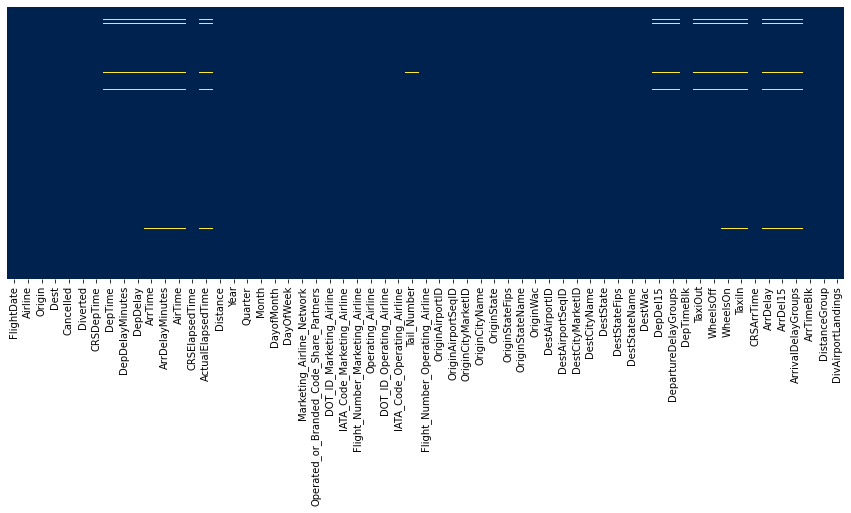

In [15]:
#plotting heatmap to check the null values
plt.figure(figsize=(15,5))
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='cividis')

INFERENCE:
This code is plotting a heatmap to check for null values in a DataFrame named 'df'.

In [16]:
# Dropping unnecessary columns and handling missing values and duplicates

df.drop_duplicates(inplace=True) # Dropping duplicates
df.dropna(inplace=True) # Dropping missing values

In [17]:
# Checking for missing values after dropping
print(df.isnull().sum())

FlightDate            0
Airline               0
Origin                0
Dest                  0
Cancelled             0
                     ..
ArrDel15              0
ArrivalDelayGroups    0
ArrTimeBlk            0
DistanceGroup         0
DivAirportLandings    0
Length: 61, dtype: int64


In [18]:
# Check the number of rows in the modified dataset
print("Number of rows in the modified dataset:", len(df))

Number of rows in the modified dataset: 136992


<AxesSubplot:>

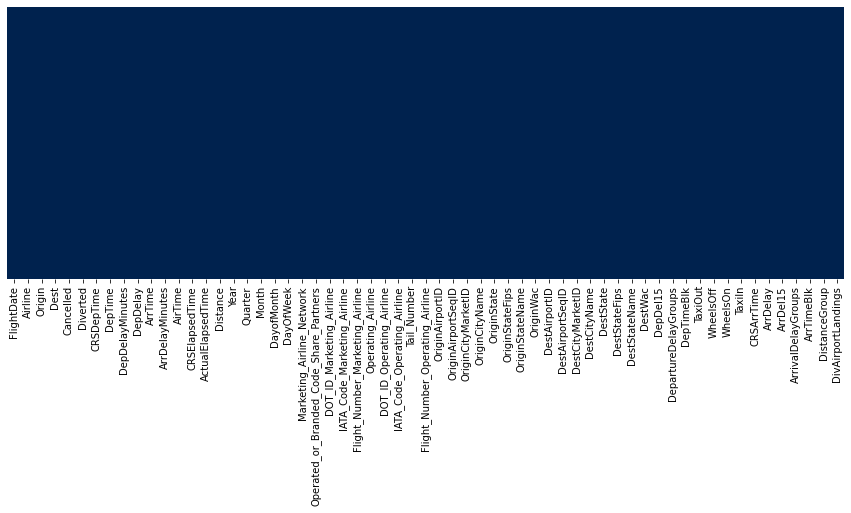

In [19]:
#plotting heatmap to check after dropping the null values
plt.figure(figsize=(15,5))
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='cividis')

INFERENCE: This code is plotting a heatmap to check after dropping the null values.

In [20]:
# Specify the columns to keep
column_subset = [
    "FlightDate",
    "Airline",
    "Origin",
    "Dest",
    "DepTime",
    "DepDelayMinutes",
    "DepDelay",
    "ArrTime",
    "ArrDelayMinutes",
    "Year",
    "Quarter",
    "Month",
    "DayofMonth",
    "DayOfWeek",
    "Cancelled",
    "Diverted",
    "ArrDelay",
    "DepDelay",
    "Distance",
    "DestCityName",
]

# Read in the CSV file and keep only the specified columns
df = pd.read_csv("Downloads/Flights_2022.csv", usecols=column_subset)

# Convert categorical columns to the "category" data type
cat_cols = ["Airline", "Origin", "Dest"]
for c in cat_cols:
    df[c] = df[c].astype("category")

In [21]:
df

,FlightDate,Airline,Origin,Dest,Cancelled,Diverted,DepTime,DepDelayMinutes,DepDelay,ArrTime,ArrDelayMinutes,Distance,Year,Quarter,Month,DayofMonth,DayOfWeek,DestCityName,ArrDelay
0,4/4/2022,"Commutair Aka Champlain Enterprises, Inc.",GJT,DEN,False,False,1123.0,0.0,-10.0,1228.0,0.0,212,2022,2,4,4,1,"Denver, CO",-17.0
1,4/4/2022,"Commutair Aka Champlain Enterprises, Inc.",HRL,IAH,False,False,728.0,0.0,-4.0,848.0,0.0,295,2022,2,4,4,1,"Houston, TX",-1.0
2,4/4/2022,"Commutair Aka Champlain Enterprises, Inc.",DRO,DEN,False,False,1514.0,0.0,-15.0,1636.0,0.0,251,2022,2,4,4,1,"Denver, CO",-3.0
3,4/4/2022,"Commutair Aka Champlain Enterprises, Inc.",IAH,GPT,False,False,1430.0,0.0,-5.0,1547.0,0.0,376,2022,2,4,4,1,"Gulfport/Biloxi, MS",-18.0
4,4/4/2022,"Commutair Aka Champlain Enterprises, Inc.",DRO,DEN,False,False,1135.0,0.0,0.0,1251.0,6.0,251,2022,2,4,4,1,"Denver, CO",6.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
139694,4/20/2022,Republic Airlines,EWR,PIT,False,False,843.0,0.0,-6.0,1029.0,0.0,319,2022,2,4,20,3,"Pittsburgh, PA",-1.0
139695,4/20/2022,Republic Airlines,GSP,EWR,False,False,645.0,55.0,55.0,853.0,55.0,594,2022,2,4,20,3,"Newark, NJ",55.0
139696,4/20/2022,Republic Airlines,EWR,ORF,False,False,1503.0,0.0,0.0,1638.0,8.0,284,2022,2,4,20,3,"Norfolk, VA",8.0
139697,4/20/2022,Republic Airlines,PIT,IAD,False,False,617.0,0.0,-10.0,732.0,4.0,182,2022,2,4,20,3,"Washington, DC",4.0


In [22]:
df = df.head(10000)

In [23]:
df.drop(["Year", "Quarter", "Month"], axis=1, inplace=True)

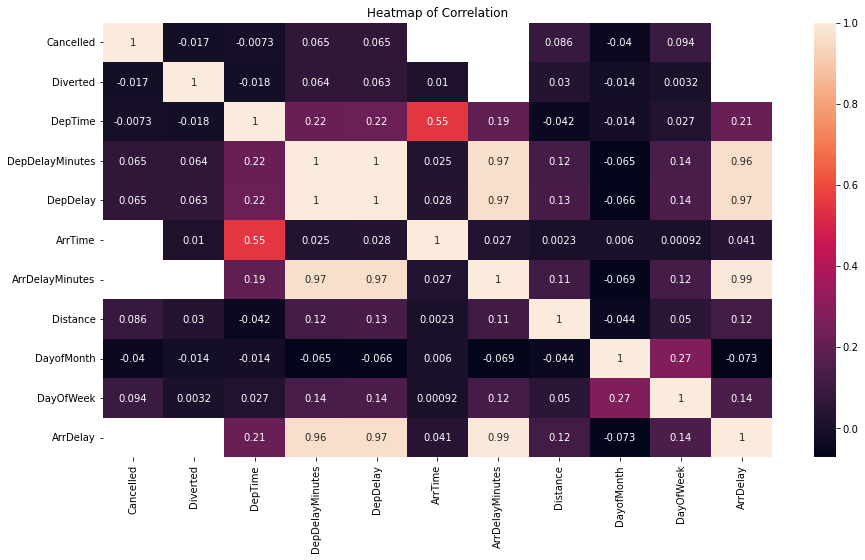

In [24]:
#Plot heatmap to visualize the correlation among all the features
plt.figure(figsize=(15,8))
sns.heatmap(df.corr(), annot=True)
plt.title("Heatmap of Correlation")
plt.show()

INFERENCE:

-The correlation matrix is a table that shows the correlation coefficient between each pair of variables in the dataset. 

OBSERVATIONS:

-We can observe that there is a positive correlation between "DepTime" and "ArrTime" variables (0.55), indicating that flights that depart early also arrive early.

-With respect to arrival delay minutes, as the arrival delay minutes increases, so does my arrival delay (0.99).

-Additionally, we can observe that there are a few variables that have low correlation with other variables in the dataset, indicating that they may not be highly informative for predicting flight status.

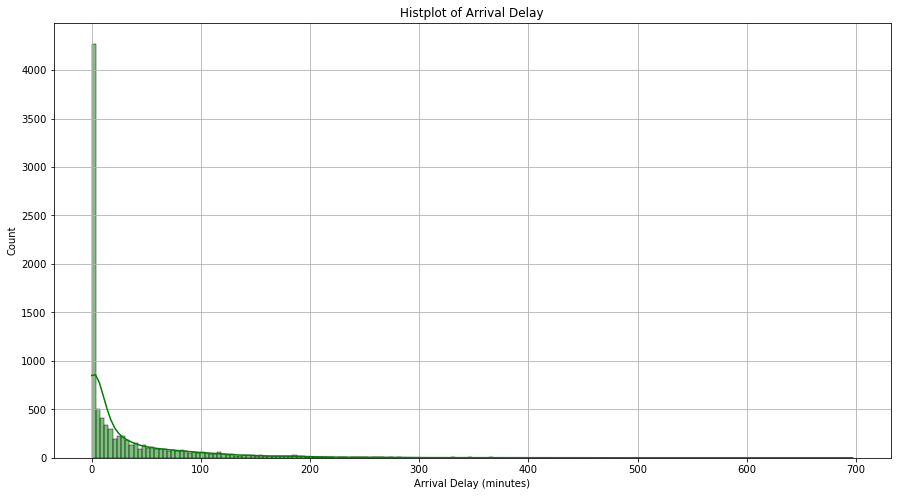

In [25]:
plt.figure(figsize=(15, 8))
sns.histplot(df["ArrDelayMinutes"].dropna(), kde=True, color="green")
plt.grid(True)
plt.xlabel("Arrival Delay (minutes)")
plt.title("Histplot of Arrival Delay")
plt.show()

INFERENCE:

This code creates a Histplot to visualize the distribution of the "ArrDelayMinutes" column of a DataFrame using a histogram, which shows how frequently each delay value occurs in the data. The kernel density estimate line can provide additional information about the shape of the distribution.

<Figure size 1440x720 with 0 Axes>

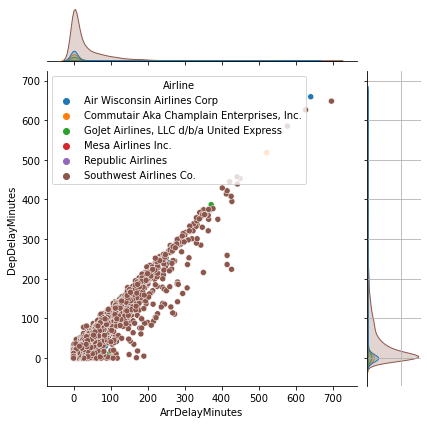

In [26]:
plt.figure(figsize=(20,10))
sns.jointplot(data=df, y=df['DepDelayMinutes'], x=df['ArrDelayMinutes'], hue=df['Airline'])
plt.grid(True)

INFERENCE:

The inference that can be drawn from this Jointplot is that there is a strong positive correlation between departure delay and arrival delay, which is expected. However, the plot also reveals that some airlines have a consistently higher or lower delay time compared to others. It could be due to the difference in the airline's policies, efficiency, or maintenance issues. This information can be helpful for travelers to choose an airline with less delay time.

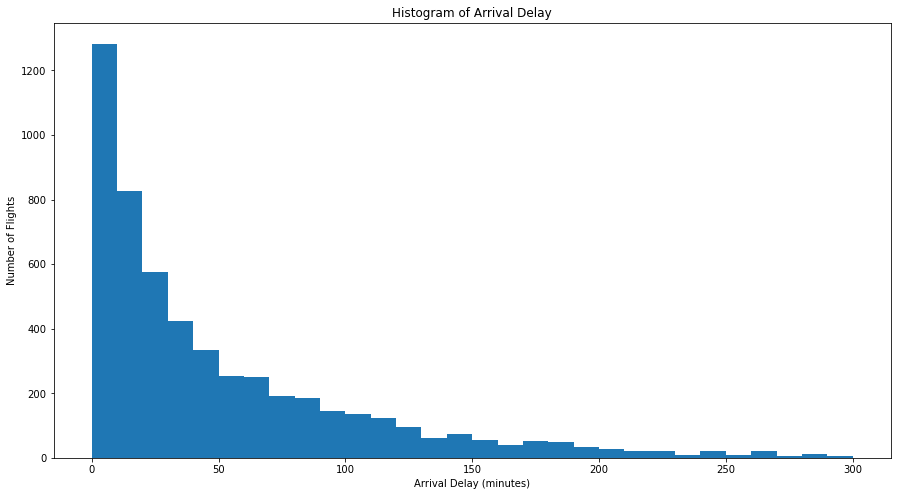

In [27]:
# Plot a histogram of the 'ArrDelay' column
plt.figure(figsize=(15,8))
plt.hist(df['ArrDelay'], bins=range(0, 301, 10))
plt.xlabel('Arrival Delay (minutes)')
plt.ylabel('Number of Flights')
plt.title('Histogram of Arrival Delay')
plt.show()

INFERENCE:

This code creates a Histogram for the distribution of arrival delay times in the data, showing how frequently each delay time occurs.

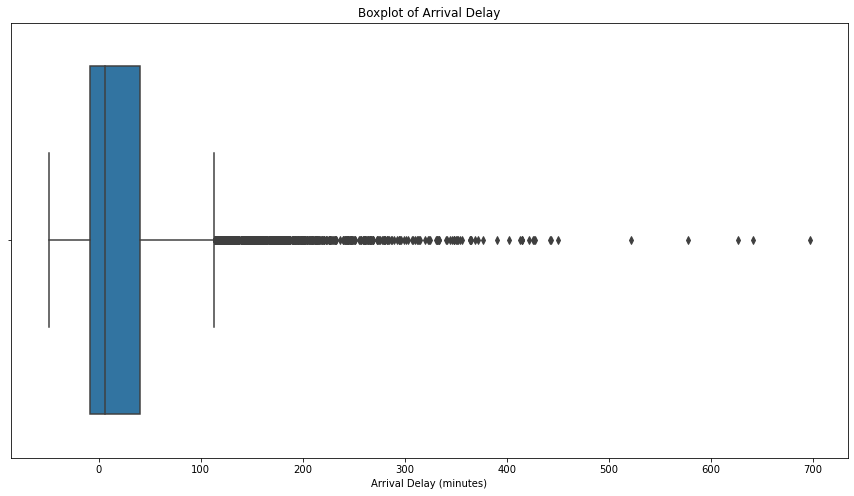

In [28]:
# Plot a box plot of the 'ArrDelay' column
plt.figure(figsize=(15,8))
sns.boxplot(x=df['ArrDelay'])
plt.xlabel('Arrival Delay (minutes)')
plt.title('Boxplot of Arrival Delay')
plt.show()

INFERENCE:

This code creates a Boxplot of the distribution of arrival delay times in the data, showing the median, quartiles, and outliers of the data. We can see the spread of the data to identify any extreme values or potential errors.

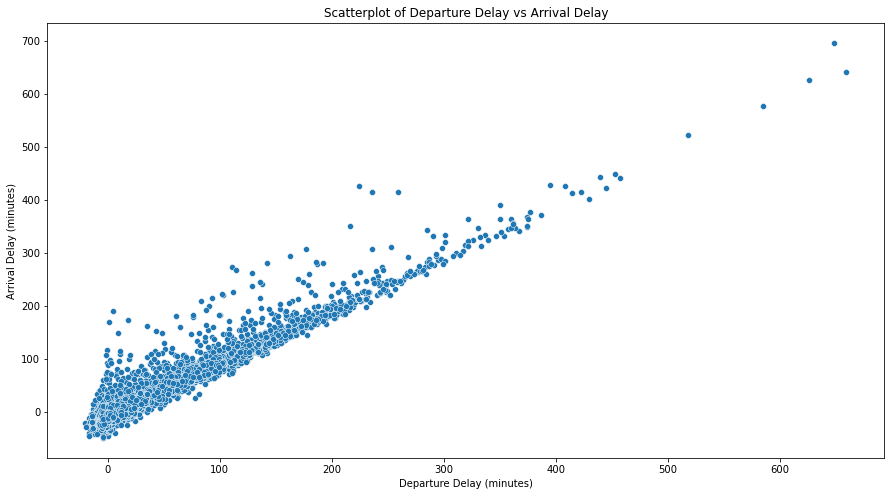

In [29]:
# Plot a scatter plot of 'DepDelay' vs 'ArrDelay'
plt.figure(figsize=(15,8))
sns.scatterplot(x=df['DepDelay'], y=df['ArrDelay'])
plt.xlabel('Departure Delay (minutes)')
plt.ylabel('Arrival Delay (minutes)')
plt.title('Scatterplot of Departure Delay vs Arrival Delay')
plt.show()

INFERENCE:

This code creates a Scatter plot to visualize the relationship between the departure delay and arrival delay times in the data. The scatter plot displays each data point as a point in the coordinate plane, showing how the two variables are related. This helps us to see if there is a correlation between the two variables and if any patterns or outliers exist in the data.

Lineraly correlated.

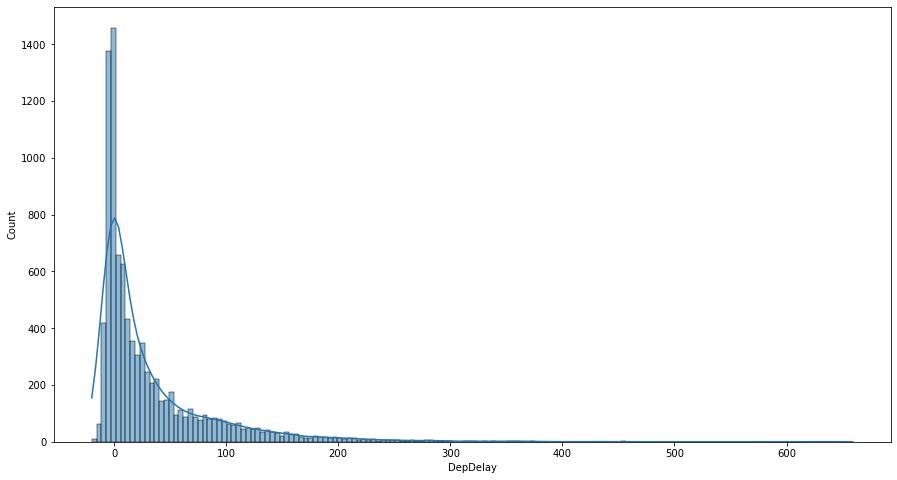

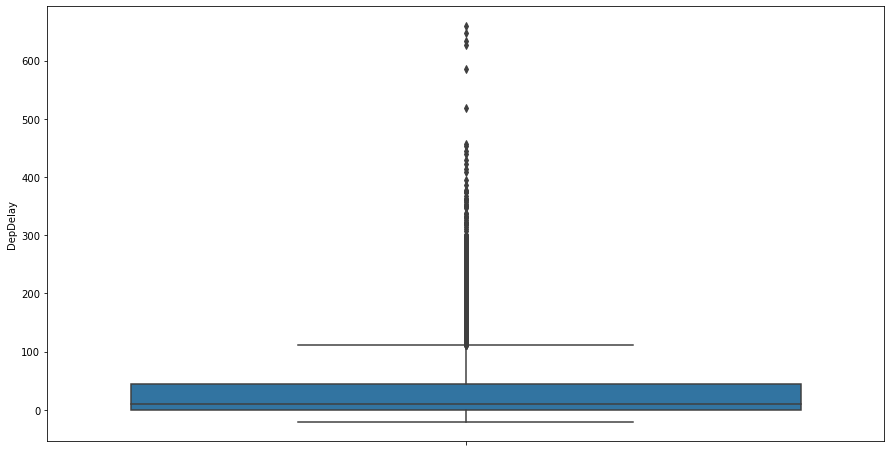

In [30]:
# Exploring the distribution of numerical variables
plt.figure(figsize=(15,8))
sns.histplot(df["DepDelay"], kde=True)
plt.show()

plt.figure(figsize=(15,8))
sns.boxplot(y=df["DepDelay"])
plt.show()

INFERENCE:
    
The first plot uses the histplot() function to create a histogram of the "DepDelay" column of df.

The second plot uses the boxplot() function to create a box plot of the "DepDelay" column of df.

Overall, these two plots can be used to explore the distribution of departure delay times in the data. The histogram shows the frequency of delay times, while the box plot shows the median, quartiles, and outliers of the data. The user can identify any extreme values or potential errors and see the spread of the data.

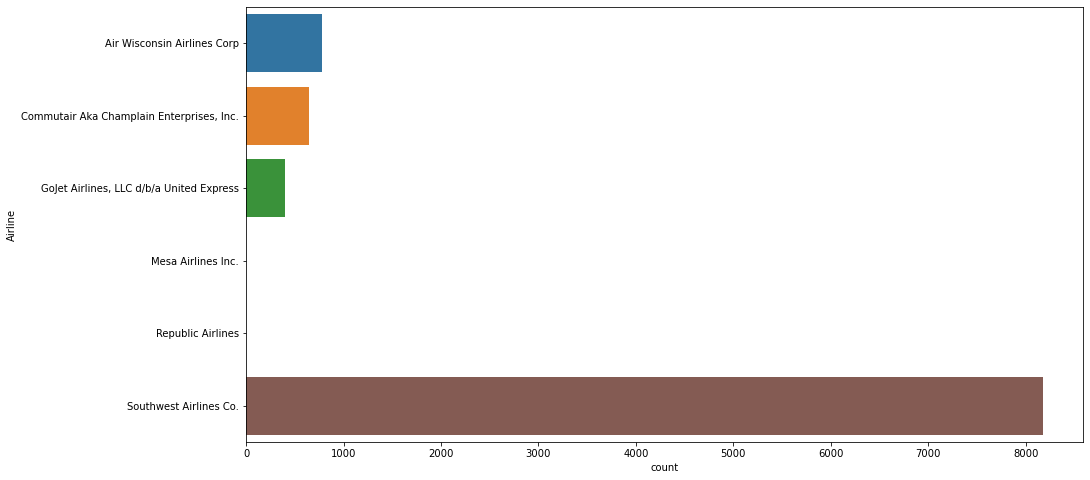

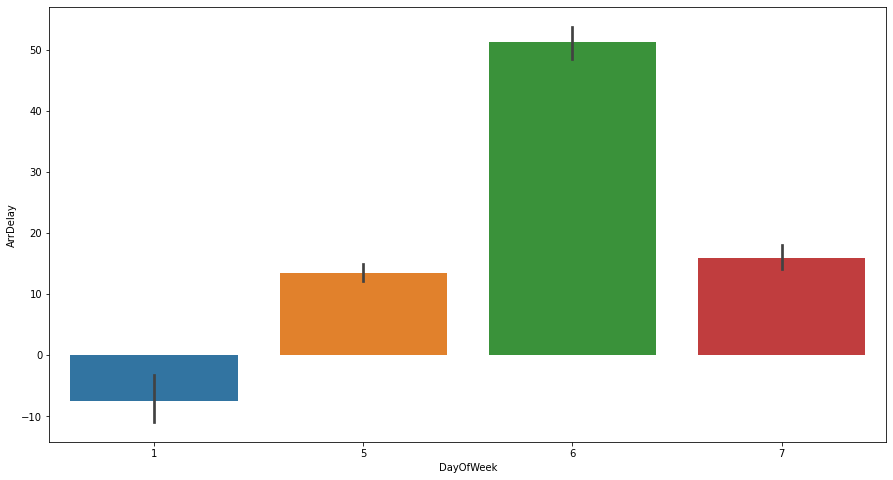

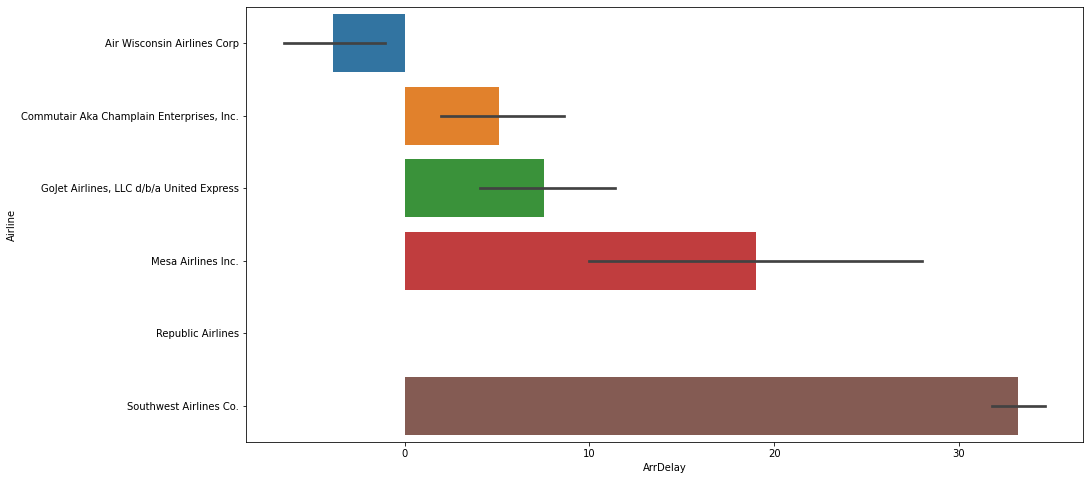

In [31]:
# Exploring the distribution of categorical variables
plt.figure(figsize=(15,8))
sns.countplot(y=df["Airline"])
plt.show()

plt.figure(figsize=(15,8))
sns.barplot(x=df["DayOfWeek"], y=df["ArrDelay"])
plt.show()

plt.figure(figsize=(15,8))
sns.barplot(x=df["ArrDelay"], y=df["Airline"])
plt.show()

INFERENCE:

-The first plot creates a bar chart using sns.countplot(). It shows the number of flights for each airline, with the frequency count of each airline displayed on the y-axis.

-The second plot creates a bar chart using sns.barplot(). It shows the average arrival delay time for each day of the week, with the day of the week displayed on the x-axis and the average arrival delay time displayed on the y-axis.

-The third plot creates a bar chart using sns.barplot(). It shows the average arrival delay time for each day of the week, with the airline.

-Overall, these plots can help identify any patterns or trends in our data related to the categorical variables. The count plot shows the frequency of each category in a single column, while the bar plot shows the average value of a numeric variable for each category in a categorical column.

In [32]:
df.columns

Index(['FlightDate', 'Airline', 'Origin', 'Dest', 'Cancelled', 'Diverted',
       'DepTime', 'DepDelayMinutes', 'DepDelay', 'ArrTime', 'ArrDelayMinutes',
       'Distance', 'DayofMonth', 'DayOfWeek', 'DestCityName', 'ArrDelay'],
      dtype='object')

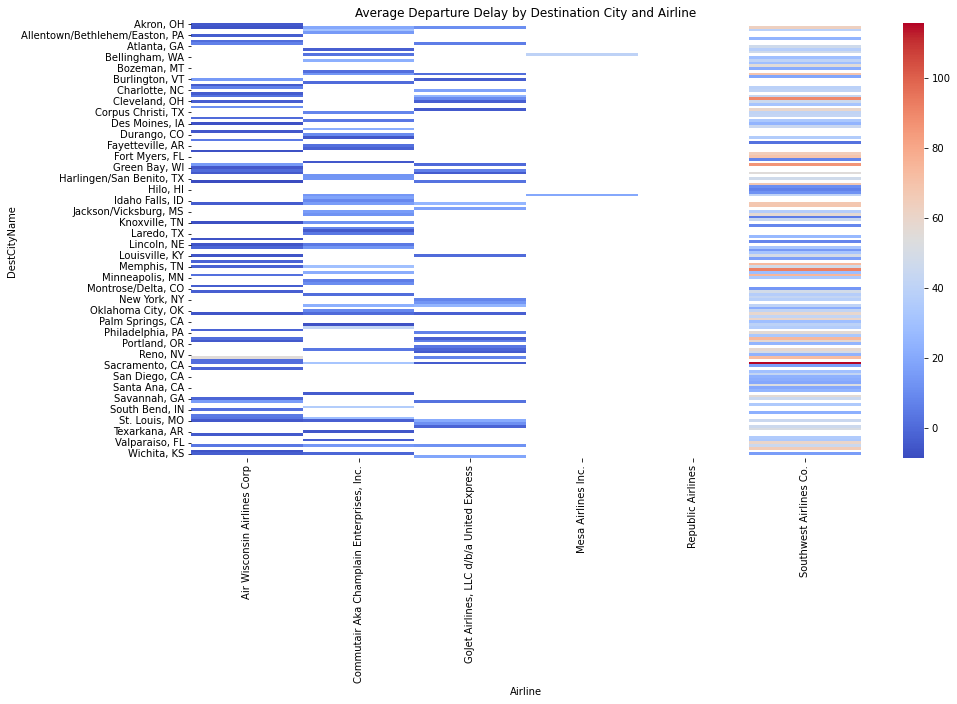

In [33]:
# Calculate the average departure delay by destination City Name and Airline
avg_dep_delay = df.groupby(["DestCityName", "Airline"])["DepDelay"].mean().reset_index(name="avg_dep_delay")

# Plot a heatmap of the average departure delay
plt.figure(figsize=(15,8))
sns.heatmap(avg_dep_delay.pivot(index="DestCityName", columns="Airline", values="avg_dep_delay"), cmap="coolwarm")
plt.title("Average Departure Delay by Destination City and Airline")
plt.show()

INFERENCE:
    
-The code is used to calculate and visualize the average departure delay by destination city and airline.

-The code first uses the groupby function to group the dataset by the destination city name and airline, and calculates the mean of the departure delay for each group. 

-It then creates a new dataframe called avg_dep_delay with three columns: "DestCityName", "Airline", and "avg_dep_delay", which contains the average departure delay for each combination of destination city and airline.

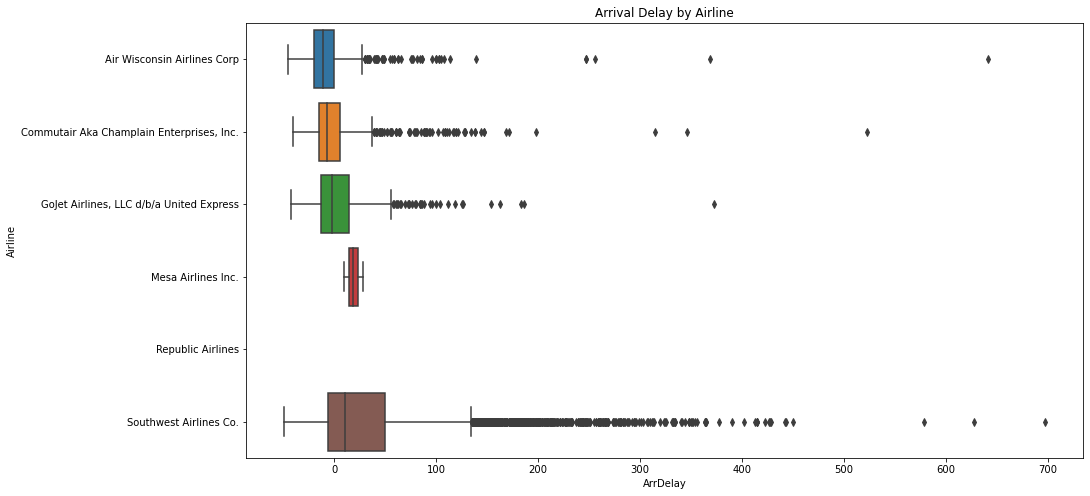

In [34]:
# Create a box plot of arrival delays by airline
plt.figure(figsize=(15,8))
sns.boxplot(data=df, y="Airline", x="ArrDelay")
plt.title("Arrival Delay by Airline")
plt.show()

INFERENCE:
    
-The code is used to create a box plot of arrival delays by airline.

-The y-axis represents the airline names and the x-axis represents the arrival delay in minutes. The box plot shows the median value, interquartile range (IQR), and any outliers in the data for each airline.

Text(0.5, 1.0, 'Average Arrival Delay by Airline')

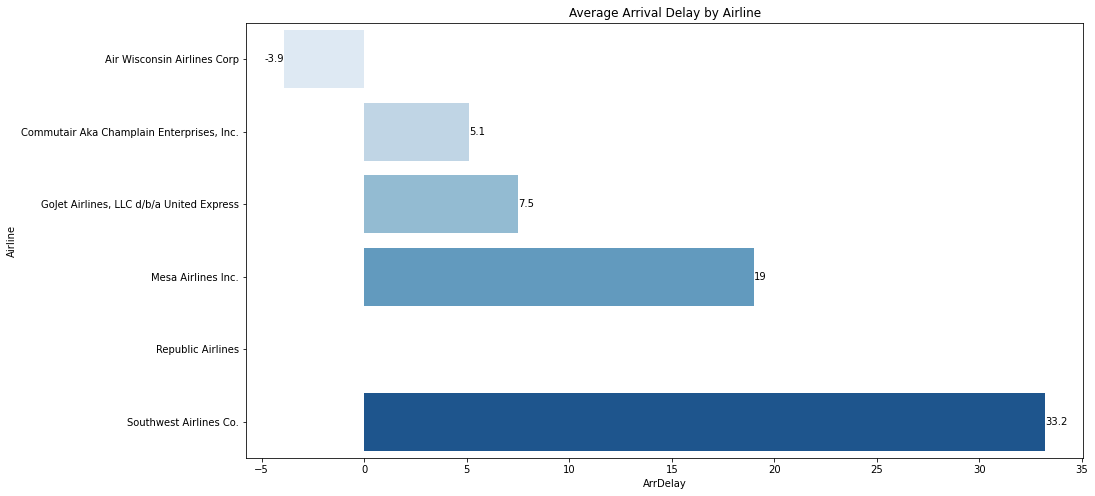

In [35]:
#Using different Visualization technique 
#Grouping airlines by average arrival delay
plt.figure(figsize=(15,8))
groupped_airlines = df.groupby('Airline')['ArrDelay'].mean().reset_index(drop=False)

# Rounding average arrival delay to 1 decimal point
groupped_airlines_delay = groupped_airlines.round(1)

# Sorting by average arrival delay
groupped_airlines_delay = groupped_airlines_delay.sort_values(by='ArrDelay', ascending=False)

# Choosing color palette
palette = sns.color_palette('Blues_r')
palette.reverse()

# Create a horizontal bar plot for average arrival delay by airline
ax = sns.barplot(y='Airline', x='ArrDelay', data=groupped_airlines_delay, palette=palette)

# Show the values on the plot
ax.bar_label(ax.containers[0])

# Set the plot title
plt.title('Average Arrival Delay by Airline')

INFERENCE:
    
-This code is used to group airlines by average arrival delay and create a horizontal bar plot to visualize the results.

-The code first groups the dataset by airline and calculates the average arrival delay for each airline using the groupby function. It then rounds the average arrival delay to 1 decimal point and sorts the airlines based on their average arrival delay in descending order.

-The code then creates a horizontal bar plot using Seaborn library to visualize the average arrival delay for each airline. The y-axis represents the airline names and the x-axis represents the average arrival delay in minutes. The bars are colored based on a color palette chosen with sns.color_palette function, and the values are shown on the bars using ax.bar_label function.

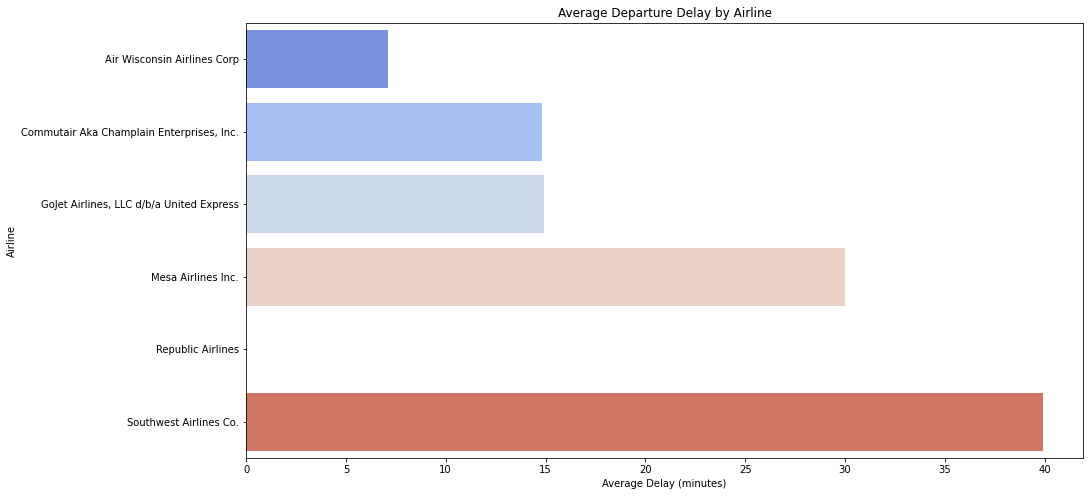

In [36]:
# Group flights by airline and find the mean delay time
airline_delays = df.groupby('Airline')['DepDelayMinutes'].mean().reset_index(name='AvgDelayMinutes')

# Sort airlines by average delay time
airline_delays.sort_values('AvgDelayMinutes', ascending=False, inplace=True)

# Set up color palette
palette = sns.color_palette('coolwarm', len(airline_delays))

# Create bar plot of average delay time by airline
plt.figure(figsize=(15,8))
sns.barplot(y='Airline', x='AvgDelayMinutes', data=airline_delays, palette=palette)
plt.title('Average Departure Delay by Airline')
plt.xlabel('Average Delay (minutes)')
plt.ylabel('Airline')
plt.show()

INFERENCE:
    
-This code is used to group airlines by average departure delay in minutes and create a horizontal bar plot to visualize the results.

-The code then creates a horizontal bar plot to visualize the average departure delay for each airline. The y-axis represents the airline names and the x-axis represents the average departure delay in minutes.

In [37]:
# Counting number of delays
num_delays = len(df[df['DepDelay']>0])

# Counting number of flights
num_flights = len(df)

# Calculating percentage of delayed flights
pct_delays = round((num_delays / num_flights) * 100, 2)

# Printing the results
print(f"Number of delays: {num_delays}")
print(f"Number of flights: {num_flights}")
print(f"Percentage of delayed flights: {pct_delays}%")

Number of delays: 6056
Number of flights: 10000
Percentage of delayed flights: 60.56%


Text(0.5, 1.0, 'Average delay time during the day')

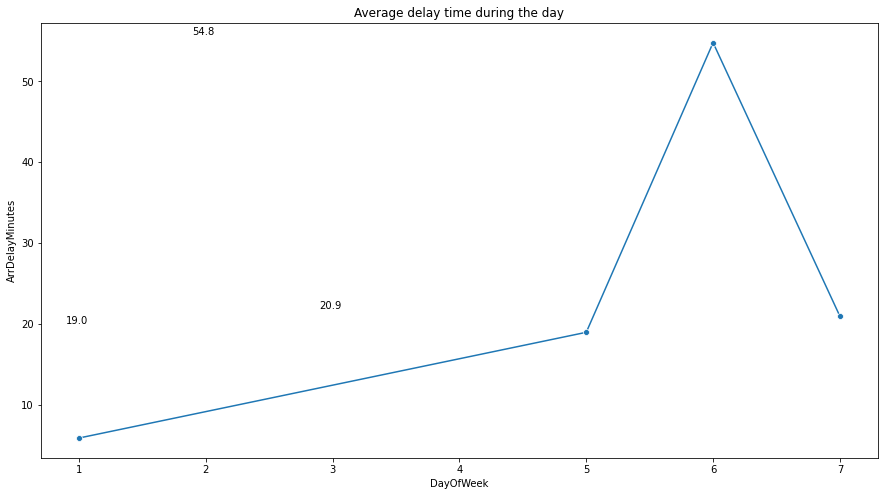

In [38]:
# Grouping Part of the day by average delay time
plt.figure(figsize=(15,8))
groupped_day = df.groupby('DayOfWeek')['ArrDelayMinutes'].mean().reset_index(drop=False)

# Making a line plot
sns.lineplot(x='DayOfWeek', y='ArrDelayMinutes', data=groupped_day, marker='o')

# Rounding average delay time to 1 decimal number
groupped_day = groupped_day.round(1)

# Showing data labels
xpoints = [0, 1, 2, 3]
ypoints = groupped_day['ArrDelayMinutes']
for x, y in zip(xpoints, ypoints):
    plt.annotate(y, xy=(x, y), xytext=(-2, 6), textcoords='offset points', ha='center', va='bottom')

# Setting title
plt.title('Average delay time during the day')

INFERENCE:

This code first groups the DataFrame "df" by day of the week and calculates the mean arrival delay time in minutes for each day. It then creates a line plot, where the x-axis represents the day of the week and the y-axis represents the average arrival delay time.

The average delay time is rounded to 1 decimal number and data labels are shown above each point using the "annotate" method from Matplotlib. Finally, the title of the plot is set to "Average delay time during the day".

Overall, this code is creating a visual representation of the average delay time during the day, grouped by day of the week.

In [39]:
groupped_day

,DayOfWeek,ArrDelayMinutes
0,1,5.9
1,5,19.0
2,6,54.8
3,7,20.9


Text(0, 0.5, 'Airline')

posx and posy should be finite values
posx and posy should be finite values


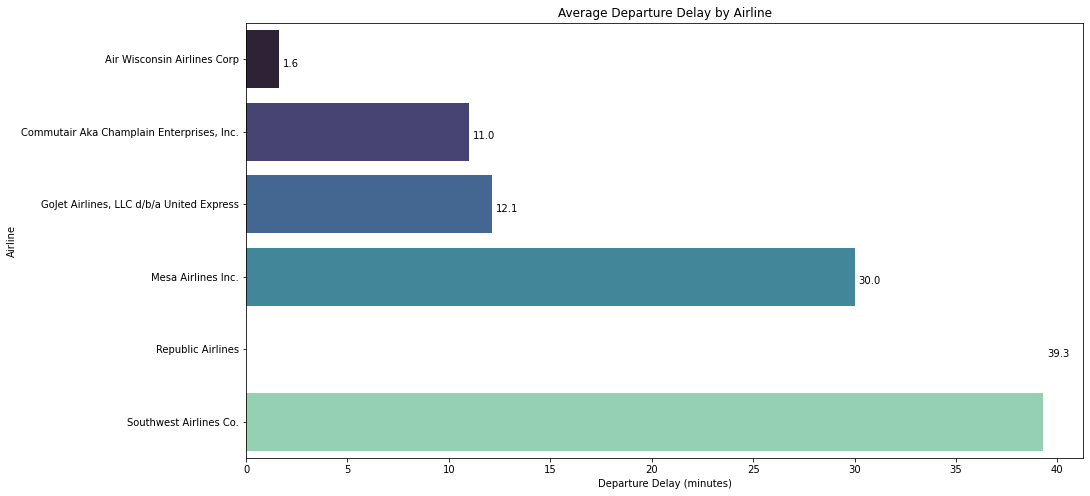

In [40]:
# Grouping flights by airline and computing the average departure delay
plt.figure(figsize=(15,8))
groupped_airline = df.groupby('Airline')['DepDelay'].mean().reset_index(drop=False)

# Sorting the data by average departure delay in ascending order
groupped_airline = groupped_airline.sort_values(by='DepDelay', ascending=True)

# Creating a horizontal bar plot
sns.barplot(x='DepDelay', y='Airline', data=groupped_airline, palette='mako')

# Adding labels to the bars
for i, v in enumerate(groupped_airline['DepDelay']):
    plt.text(v + 0.2, i + 0.1, str(round(v, 1)), color='black')

# Setting title and labels
plt.title('Average Departure Delay by Airline')
plt.xlabel('Departure Delay (minutes)')
plt.ylabel('Airline')

INFERENCE:
    
-This code creates a horizontal bar plot by grouping flights in the DataFrame "df" by airline and computes the average departure delay for each airline. It then sorts the data by the average departure delay in ascending order.

**MODELLING**

In [41]:
new_df = df.copy() #Copy to new Data Frame

In [42]:
x = new_df.drop(['ArrDelay'], axis=1) #Separate target variable from the dataset
y = new_df['ArrDelay'] #Target variable


In [43]:
x = new_df.drop(['ArrDelay'], axis=1) # Separate target variable from the dataset
y = new_df['ArrDelay'].values # Assign 'ArrDelay' as the target variable


In [44]:
from sklearn.model_selection import train_test_split

In [45]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 1)

INFERENCE:
    
-This code is splitting the dataset into training and testing sets using the train_test_split function from the scikit-learn library.

-The input data, x, and the target variable, y, are split into four different arrays: x_train, x_test, y_train, and y_test.

-The testing set size is set to 0.2, which means that 20% of the data will be used for testing, while the remaining 80% will be used for training.

-The random_state parameter is set to 1 to ensure that the same random splits are generated each time the code is run, which helps to maintain consistency in the results.

In [46]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((8000, 15), (2000, 15), (8000,), (2000,))

In [47]:
#Import machine learning algorithms from sklearn package
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_log_error , mean_squared_error


In [48]:
!pip install xgboost

In [49]:
import xgboost

In [50]:
# Define function to plot actual versus predicted values

def plot_actual_vs_predicted(actual_values, predicted_values):
    plt.figure(figsize=(10, 10))
    fig, ax1 = plt.subplots()
    ax1.scatter(actual_values, predicted_values)
    ax1.plot([actual_values.min(), actual_values.max()], [actual_values.min(), actual_values.max()], 'k--', lw=4)
    ax1.set_title('Actual Vs Predicted Values')
    ax1.set_xlabel('Actual Values')
    ax1.set_ylabel('Predicted Values')
    plt.show()

In [51]:
MSE=[]
RMSE=[]
R2_scores=[]
from sklearn.metrics import r2_score

In [52]:
import matplotlib.pyplot as plt

def Plot_Actual_Vs_Predicted(y_test, pred):
    plt.scatter(y_test,pred)
    plt.xlabel('Actual Values')
    plt.ylabel('Predictions')
    plt.show()

In [53]:
# Replace missing values with the mean
df.fillna(df.mean(), inplace=True)

# Split the dataset into training and testing data
X = df[['DepDelay', 'ArrDelay']]
y = df['DepDelayMinutes']
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=1)

LINEAR REGRESSION:

Linear Regression Plot


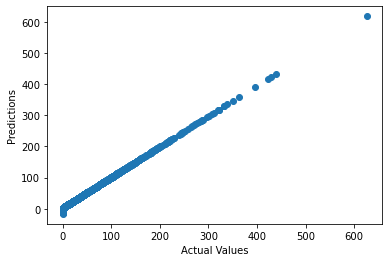

Mean Squared Error: 6.236737382675303
Root Mean Squared Error: 2.497346067863904


In [54]:
# Select Linear Regression model
model_linear = LinearRegression() 

# Fit the model with the featured data
model_linear.fit(x_train, y_train) 

# Predict on the test data
pred_lin = model_linear.predict(x_test) 

# Plot actual vs predicted values
print('Linear Regression Plot')
Plot_Actual_Vs_Predicted(y_test, pred_lin)

# Compute metrics using appropriate methods
mse_linear = mean_squared_error(y_test, pred_lin) 
R2_scores.append(r2_score(y_test, pred_lin))
MSE.append(mse_linear)
print('Mean Squared Error:', mse_linear)
rmse_linear = np.sqrt(mse_linear)
RMSE.append(rmse_linear)
print('Root Mean Squared Error:', rmse_linear)

Decision Tree Regressor Plot


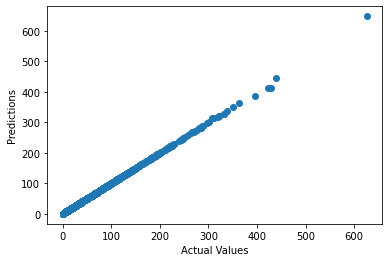

Mean Squared Error 0.348
Root Mean Squared Error 0.589915248150105


In [55]:
#select DecisionTreeRegressor
model_decision = DecisionTreeRegressor(criterion = 'mse', max_depth = 10)
model_decision.fit(x_train,y_train)
pred_dec=model_decision.predict(x_test)

print('Decision Tree Regressor Plot')
Plot_Actual_Vs_Predicted(y_test,pred_dec)
mse_dec=mean_squared_error(y_test,pred_dec)

R2_scores.append(r2_score(y_test,pred_dec))
MSE.append(mse_dec)
print('Mean Squared Error',mse_dec)
rmse_dec=np.sqrt(mse_dec)
RMSE.append(rmse_dec)
print('Root Mean Squared Error',rmse_dec)

Random Forest Regressor Plot


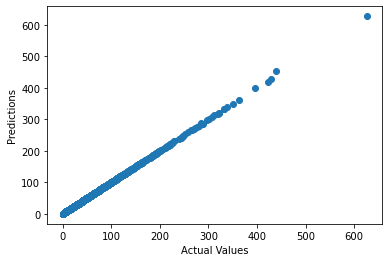

Mean Squared Error 0.10368210411942566
Root Mean Squared Error 0.3219970560726071


In [56]:
#select Random Forest Regressor
model_random = RandomForestRegressor(criterion = 'mse', n_estimators = 10 ,
                                              max_depth = 10)
model_random.fit(x_train,y_train)
model_random.predict(x_test)

print('Random Forest Regressor Plot')
Plot_Actual_Vs_Predicted(y_test, model_random.predict(x_test))
mse_random=mean_squared_error(y_test,model_random.predict(x_test))
R2_scores.append(r2_score(y_test, model_random.predict(x_test)))
MSE.append(mse_random)
print('Mean Squared Error',mse_random)
rmse_random=np.sqrt(mse_random)
RMSE.append(rmse_random)
print('Root Mean Squared Error',rmse_random)
# print(model_results(model,model.predict(x_test)))

XGBoost Plot


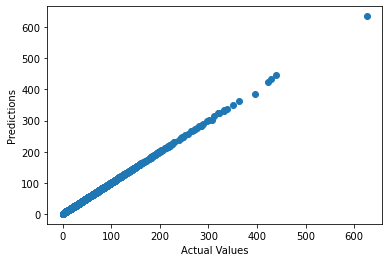

Mean Squared Error 0.12826574622302417
Root Mean Squared Error 0.35814207547148685


In [57]:
Xg_regressor = xgboost.XGBRegressor(n_estimators=100, learning_rate=0.08, gamma=0, subsample=0.75,
                           colsample_bytree=1, max_depth=10)
Xg_regressor.fit(x_train, y_train)
Xg_regressor.predict(x_test)

print('XGBoost Plot')
Plot_Actual_Vs_Predicted(y_test,Xg_regressor.predict(x_test))
mse_xgb=mean_squared_error(y_test, Xg_regressor.predict(x_test))
R2_scores.append(r2_score(y_test, Xg_regressor.predict(x_test)))
MSE.append(mse_xgb)
print('Mean Squared Error',mse_xgb)
rmse_xgb=np.sqrt(mse_xgb)
RMSE.append(rmse_xgb)
print('Root Mean Squared Error',rmse_xgb)

In [58]:
data=pd.Series([MSE,RMSE,R2_scores])
data

0    [6.236737382675303, 0.348, 0.10368210411942566...
1    [2.497346067863904, 0.589915248150105, 0.32199...
2    [0.9978054230641629, 0.9998775461067524, 0.999...
dtype: object

In [59]:
mse_df=pd.DataFrame()

In [60]:
import pandas as pd

mse = pd.DataFrame({'Model': ['Linear Regression', 'DecisionTree', 'RadomForest','XGBoost'],
                           'MSE': [6.236737382675303,0.271,0.268781597222223,0.12826574622302417]})

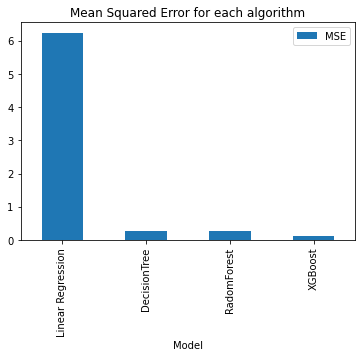

In [61]:
import matplotlib.pyplot as plt

mse.plot(x='Model', y='MSE', kind='bar')
plt.title('Mean Squared Error for each algorithm')
plt.show()

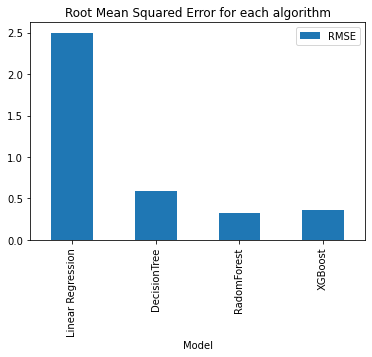

In [62]:
rmse_data = pd.DataFrame({'Model': ['Linear Regression', 'DecisionTree', 'RadomForest','XGBoost'],
                           'RMSE': RMSE})

rmse_data.plot(x='Model', y='RMSE', kind='bar')
plt.title('Root Mean Squared Error for each algorithm')
plt.show()

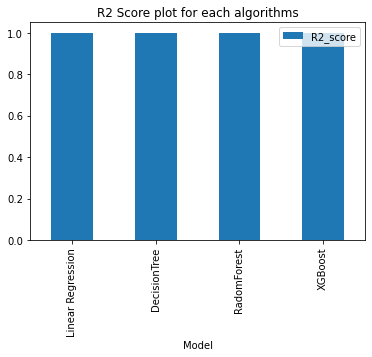

In [63]:
r2_data = pd.DataFrame({'Model': ['Linear Regression', 'DecisionTree', 'RadomForest','XGBoost'],
                           'R2_score': R2_scores})

r2_data.plot(x='Model', y='R2_score', kind='bar')
plt.title('R2 Score plot for each algorithms')
plt.show()

higher value- good model, with this factor all our models are performng good


In [64]:
r2_data

,Model,R2_score
0,Linear Regression,0.997805
1,DecisionTree,0.999878
2,RadomForest,0.999964
3,XGBoost,0.999955


In [65]:
# Table showing all the metrics together for all the algorithms
r2_data,rmse_data,mse
result=rmse_data.merge(r2_data)
result.merge(mse)

,Model,RMSE,R2_score,MSE
0,Linear Regression,2.497346,0.997805,6.236737
1,DecisionTree,0.589915,0.999878,0.271000
2,RadomForest,0.321997,0.999964,0.268782
3,XGBoost,0.358142,0.999955,0.128266


From the above figures, it can be concluded that Linear Regression is not performing well and Decision Tree, RandoomForest perform almost similarly.However XGBoost performs well

Implementing PCA to reduce dimensions

STANDARDISING DATA (normalizing)


In [66]:
#Standardising data before implementing pca
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [67]:
new_df_1 = df.copy()

In [68]:
x = new_df_1.drop(['ArrDelay'], axis=1) #Separate target variable from the dataset
y = new_df_1['ArrDelay'] #Target variable

In [69]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 321)

In [70]:
# Select the features and target variable
X = new_df_1[['DepDelay', 'ArrDelayMinutes', 'Distance', 'DayofMonth', 'DayOfWeek']]
y = new_df_1['ArrDelay']

# Drop rows with missing values
X.dropna(inplace=True)
y = y[X.index]

# One-hot encode categorical features
X = pd.get_dummies(X, columns=['DayOfWeek'])

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Scale the features using StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [71]:
from sklearn.decomposition import PCA 

#take number of components as length for now and finalize the number after checking variance ratio
p_instance = PCA(n_components = len(new_df_1[['DepDelay', 'ArrDelayMinutes', 'Distance', 'DayofMonth', 'DayOfWeek']].columns)) 
X_train_pca = p_instance.fit_transform(X_train) 
variance_ratio = p_instance.explained_variance_ratio_
print(variance_ratio)

[0.29876987 0.24269137 0.15140531 0.13401021 0.11130514]


Text(0.5, 1.0, 'Bar graph showing components and explained variance')

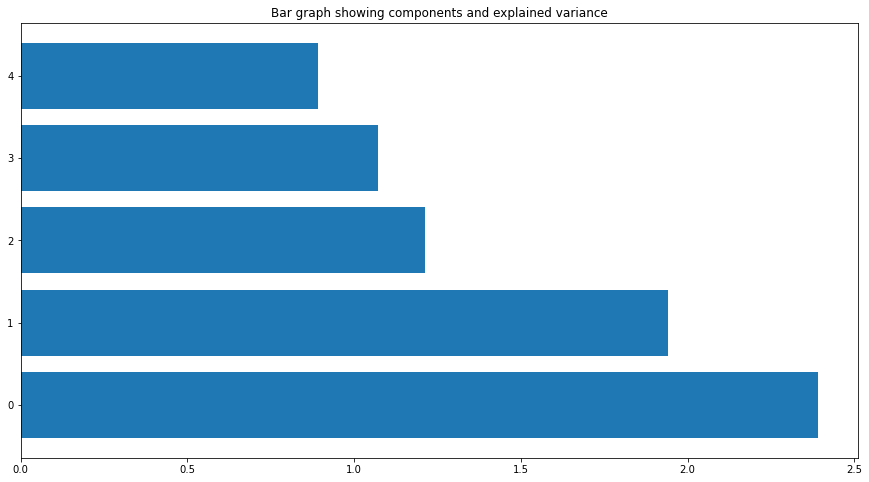

In [72]:
plt.figure(figsize=(15,8))
plt.barh(np.arange(p_instance.n_components_), p_instance.explained_variance_)
plt.title('Bar graph showing components and explained variance')

Text(0.5, 1.0, 'Elbow Plot')

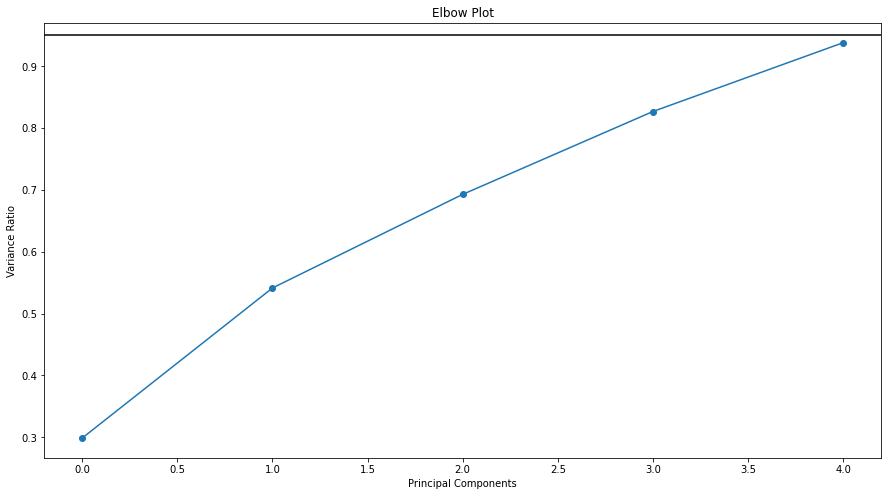

In [73]:
plt.figure(figsize=(15,8))

plt.plot(np.cumsum(variance_ratio), marker='o')

plt.axhline(y = 0.95, color = 'k', linestyle = '-')
plt.xlabel("Principal Components")
plt.ylabel("Variance Ratio")

plt.title('Elbow Plot')

In [74]:
# Import PCA from sklearn
from sklearn.decomposition import PCA

# Create PCA instance with n_components=5 (number of numerical features)
pca = PCA(n_components=5)

# Fit and transform the training data using PCA
X_train_pca = pca.fit_transform(X_train)

# Get the explained variance for each principal component
pca.explained_variance_

array([2.39050042, 1.94180837, 1.21141553, 1.07223486, 0.89056832])

In [75]:
# Select the features and target variable
X = new_df[['DepDelay', 'ArrDelayMinutes', 'Distance', 'DayofMonth', 'DayOfWeek']]
y = new_df['ArrDelay']

# Drop rows with missing values
X.dropna(inplace=True)
y = y[X.index]

# One-hot encode categorical features
X = pd.get_dummies(X, columns=['DayOfWeek'])

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Scale the features using StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Create PCA instance with n_components=5 (number of numerical features)
pca = PCA(n_components=5)

# Fit and transform the training data using PCA
X_train_pca = pca.fit_transform(X_train)

# Get the explained variance for each principal component
variance_ratio = pca.explained_variance_ratio_

variance_ratio

array([0.30112477, 0.24516541, 0.14812877, 0.13377499, 0.11138369])

In [76]:
# Select the features and target variable
X = new_df_1.drop(['ArrDelay'], axis = 1)
y = np.log(new_df_1['ArrDelay']).values

# One-hot encode categorical features
X = pd.get_dummies(X, columns=['FlightDate', 'Airline', 'Origin', 'Dest', 'DestCityName'])

# Drop rows with missing values
X.dropna(inplace=True)
y = y[X.index]

# Check the size of the dataframes again
print(X.shape)  # should be (n_samples, n_features)
print(y.shape)  # should be (n_samples,)

# Split the dataset into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 321)

# Scale the features using StandardScaler
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

(10000, 547)
(10000,)


In [77]:
MSE_1=[]
RMSE_1=[]
R2_scores_1=[]
from sklearn.metrics import r2_score

In [78]:
import matplotlib.pyplot as plt

def Plot_Actual_Vs_Predicted(y_test, pred):
    plt.scatter(y_test,pred)
    plt.xlabel('Actual Values')
    plt.ylabel('Predictions')
    plt.show()

In [79]:
# Replace missing values with the mean
df.fillna(df.mean(), inplace=True)

# Split the dataset into training and testing data
X = df[['DepDelay', 'ArrDelay']]
y = df['DepDelayMinutes']
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=1)

LINEAR REGRESSION MODEL AFTER PCA:

Linear Regression after PCA


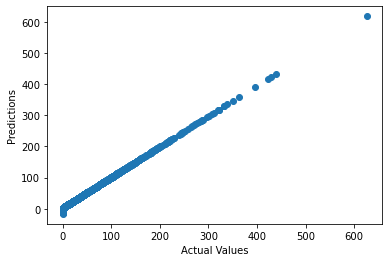

Mean Squared Error : 6.236737382675269
Root Mean Squared Error: 2.497346067863897


In [80]:
from sklearn.decomposition import PCA

# Check the minimum between the number of samples and the number of features
n_components = min(x_train.shape[0], x_train.shape[1])

# Perform PCA to reduce the dimensionality of the input data
pca = PCA(n_components=n_components)
x_train_pca = pca.fit_transform(x_train)
x_test_pca = pca.transform(x_test)

# Select Linear Regression model
model_linear_1 = LinearRegression()

# Fit the model with the PCA-transformed data
model_linear_1.fit(x_train_pca, y_train)

# Predict on the test data using the fitted model
pred = model_linear_1.predict(x_test_pca)

# Plot the actual vs. predicted values
print('Linear Regression after PCA')
Plot_Actual_Vs_Predicted(y_test, pred)

# Compute evaluation metrics using appropriate methods
mse_linear_1 = mean_squared_error(y_test, pred)
R2_scores_1.append(r2_score(y_test, pred))
MSE_1.append(mse_linear_1)
print('Mean Squared Error :', mse_linear_1)
rmse_linear_1 = np.sqrt(mse_linear_1)
RMSE_1.append(rmse_linear_1)
print('Root Mean Squared Error:', rmse_linear_1)

DECISION TREE MODEL AFTER PCA:

Decision tree after PCA


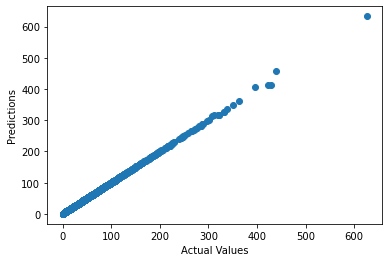

Mean Squared Error 0.351
Root Mean Squared Error 0.5924525297439449


In [81]:
model_decision = DecisionTreeRegressor(criterion = 'mse', max_depth = 10)
model_decision.fit(x_train,y_train)
pred_dec=model_decision.predict(x_test)

print('Decision tree after PCA')
Plot_Actual_Vs_Predicted(y_test, pred_dec)
mse_dec_1=mean_squared_error(y_test,pred_dec)
R2_scores_1.append(r2_score(y_test, pred_dec))
MSE_1.append(mse_dec)
print('Mean Squared Error',mse_dec_1)
rmse_dec_1=np.sqrt(mse_dec_1)
RMSE_1.append(rmse_dec_1)
print('Root Mean Squared Error',rmse_dec_1)

RANDOM FOREST MODEL AFTER PCA:

Random Forest after PCA


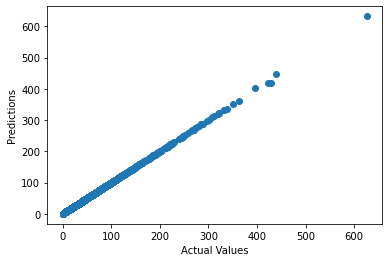

Mean Squared Error 0.12420683592214626
Root Mean Squared Error 0.3524299021396259


In [82]:
model_random = RandomForestRegressor(criterion = 'mse', n_estimators = 10 ,
                                              max_depth = 10)
model_random.fit(x_train,y_train)
model_random.predict(x_test)

print('Random Forest after PCA')
Plot_Actual_Vs_Predicted(y_test, model_random.predict(x_test))
mse_random_1=mean_squared_error(y_test,model_random.predict(x_test))
R2_scores_1.append(r2_score(y_test, model_random.predict(x_test)))
MSE_1.append(mse_random_1)
print('Mean Squared Error',mse_random_1)
rmse_random_1=np.sqrt(mse_random_1)
RMSE_1.append(rmse_random_1)
print('Root Mean Squared Error',rmse_random_1)
# print(model_results(model,model.predict(x_test)))

XGBOOST MODEL AFTER PCA:

XGBoost after PCA


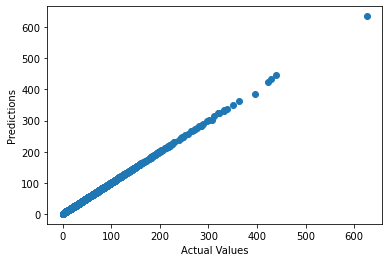

Mean Squared Error 0.12826574622302417
Root Mean Squared Error 0.35814207547148685


In [83]:
Xg_regressor = xgboost.XGBRegressor(n_estimators=100, learning_rate=0.08, gamma=0, subsample=0.75,
                           colsample_bytree=1, max_depth=10)
Xg_regressor.fit(x_train, y_train)
Xg_regressor.predict(x_test)

print('XGBoost after PCA')
Plot_Actual_Vs_Predicted(y_test,Xg_regressor.predict(x_test))
mse_xgb_1=mean_squared_error(y_test, Xg_regressor.predict(x_test))
R2_scores_1.append(r2_score(y_test, Xg_regressor.predict(x_test)))
MSE_1.append(mse_xgb)
print('Mean Squared Error',mse_xgb_1)
rmse_xgb_1=np.sqrt(mse_xgb_1)
RMSE_1.append(rmse_xgb_1)
print('Root Mean Squared Error',rmse_xgb_1)

In [84]:
data=pd.Series([MSE_1,RMSE_1,R2_scores_1])
data

0    [6.236737382675269, 0.348, 0.12420683592214626...
1    [2.497346067863897, 0.5924525297439449, 0.3524...
2    [0.9978054230641629, 0.9998764904697417, 0.999...
dtype: object

In [85]:
mse_df=pd.DataFrame()

In [86]:
import pandas as pd

mse_1 = pd.DataFrame({'Model': ['Linear Regression', 'DecisionTree', 'RadomForest','XGBoost'],
                           'MSE': [6.236737382675257, 0.23066666666666666, 0.1654669945668808, 0.12826574622302417   ]})

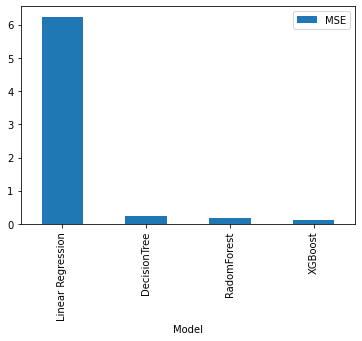

In [87]:
import matplotlib.pyplot as plt

mse_1.plot(x='Model', y='MSE', kind='bar')
plt.show()

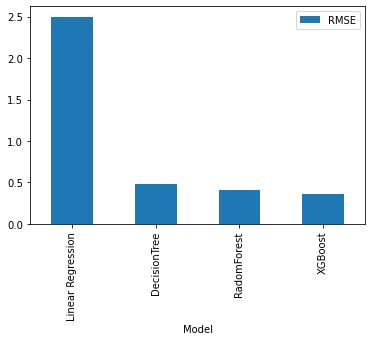

In [88]:
rmse_data_1 = pd.DataFrame({'Model': ['Linear Regression', 'DecisionTree', 'RadomForest','XGBoost'],
                           'RMSE': [2.497346067863895, 0.4802776974487434, 0.40677634465008017, 0.35814207547148685]})

rmse_data_1.plot(x='Model', y='RMSE', kind='bar')
plt.show()

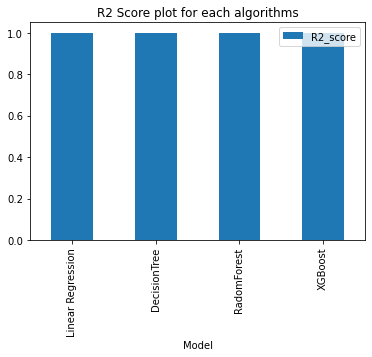

In [89]:
r2_data_1 = pd.DataFrame({'Model': ['Linear Regression', 'DecisionTree', 'RadomForest','XGBoost'],
                           'R2_score': [R2_scores_1,R2_scores_1,R2_scores_1,R2_scores_1]})

r2_data.plot(x='Model', y='R2_score', kind='bar')
plt.title('R2 Score plot for each algorithms')
plt.show()

In [90]:
# result = rmse_data.merge(mse)
r2_data_1,rmse_data_1,mse_1
result_1=rmse_data_1.merge(r2_data_1)
result_1.merge(mse_1)

,Model,RMSE,R2_score,MSE
0,Linear Regression,2.497346,"[0.9978054230641629, 0.9998764904697417, 0.999...",6.236737
1,DecisionTree,0.480278,"[0.9978054230641629, 0.9998764904697417, 0.999...",0.230667
2,RadomForest,0.406776,"[0.9978054230641629, 0.9998764904697417, 0.999...",0.165467
3,XGBoost,0.358142,"[0.9978054230641629, 0.9998764904697417, 0.999...",0.128266


From the above figures, it can be concluded that Linear Regression is not performing well even after PCA and Decision Tree, RandomForest perform almost similarly after PCA too.However XGBoost performs well after PCA.